## 房价预测任务
目标：根据房屋属性预测每个房子的最终价格。
<img src="./img/6.png" alt="FAO" width="390" align="right">

任务流程：

（一）：分析数据指标
* 不同指标对结果的影响
* 连续值与离散值的情况

（二）：观察数据正太性
* 是否满足正太分布
* 数据变换操作

（三）：数据预处理
* 缺失值填充
* 标签转换 

（四）：集成方法建模对比
* 单模型回归效果
* 平均与堆叠效果对比

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [59]:
df_train = pd.read_csv('./data/train.csv')

In [60]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

* MSSubClass：建筑类              
* mszoning：一般的分区分类
* LotFrontage：街道连接属性线性英尺
* LotArea：平方英尺批量
* 街道：道路通行方式
* 小巷：通道入口的类型
* LotShape：财产的形状
* LandContour：财产的平整度
* 实用程序：可用的实用程序类型
* LotConfig：很多配置
* LandSlope：坡的财产
* 邻近：Ames市区范围内的物理位置
* 状态：邻近主要道路或铁路
* 条件：靠近主要道路或铁路（如果第二存在）
* BldgType：住宅类型
* housestyle：风格的住宅
* overallqual：整体材料和完成质量
* overallcond：总体状况评价
* yearbuilt：原施工日期
* yearremodadd：重塑日期
* RoofStyle：屋顶类型
* RoofMatl：屋面材料
* exterior1st：外部覆盖的房子
* exterior2nd：外部覆盖的房子（如果有一个以上的材料）
* MasVnrType：砌体饰面型
* masvnrarea：砌体饰面面积平方英尺
* exterqual：外部材料质量
* extercond：在外部的物质条件
* 基金会：基金会的类型
* BsmtQual：地下室的高度
* bsmtcond：地下室的一般条件
* BsmtExposure：罢工或花园层地下室墙
* bsmtfintype1：质量基底成品区
* bsmtfinsf1：型完成1平方英尺
* bsmtfintype2：质量第二成品区（如果有的话）
* bsmtfinsf2：型完成2平方英尺
* BsmtUnfSF：未完成的平方英尺的地下室
* totalbsmtsf：地下室面积总平方英尺
* 加热：加热类型
* heatingqc：加热质量和条件
* 中央：中央空调
* 电气：电气系统
* 1stflrsf：一楼平方英尺
* 2ndflrsf：二楼平方英尺
* lowqualfinsf：完成平方英尺Low质量（各楼层）
* grlivarea：以上等级（地）居住面积平方英尺
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath：地下室半浴室
* FullBath：完整的浴室级以上
* HalfBath：半浴室级以上
* 卧室：高于地下室的卧室数
* 厨房：厨房数量
* kitchenqual：厨房的品质
* totrmsabvgrd：房间总级以上（不包括卫生间）
* 功能：家庭功能评级
* 一些壁炉壁炉：
* fireplacequ：壁炉质量
* GarageType：车库位置
* GarageYrBlt：建立年车库
* GarageFinish：车库的室内装修
* GarageCars：在汽车车库大小的能力
* GarageArea：在平方英尺的车库规模
* GarageQual：车库质量
* garagecond：车库条件
* paveddrive：铺的车道
* WoodDeckSF：平方英尺的木甲板面积
* openporchsf：平方英尺打开阳台的面积
* enclosedporch：封闭式阳台的面积以平方英尺
* 3ssnporch：平方英尺三季阳台的面积
* screenporch：平方英尺纱窗门廊区
* PoolArea：在平方英尺的游泳池
* poolqc：池质量
* 栅栏：栅栏的质量
* miscfeature：杂项功能在其他类未包括
* miscval：$杂特征值
* MoSold：月销售
* YrSold：年销售
* SaleType：销售类型
* salecondition：销售条件

In [61]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

首先来看一下，我们的目标满足正态分布嘛？

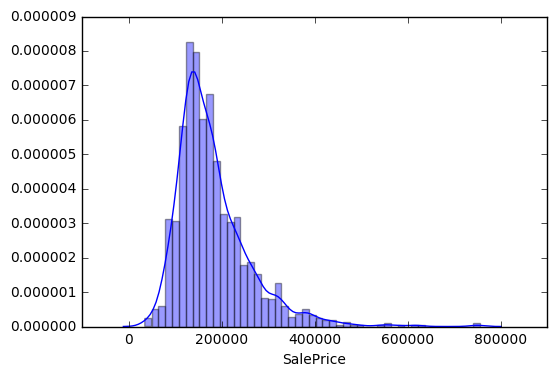

In [62]:
sns.distplot(df_train['SalePrice']);

看起来还可以，我们来观察一下它的偏度值

In [63]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


看起来偏度比较大，我们发现了一条大尾巴，一会咱们把解决掉它。
接下来再看看一些比较重要的属性对结果的影响

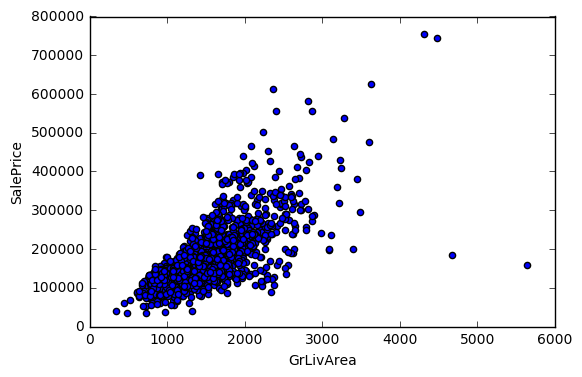

In [64]:
#居住面积平方英尺
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

越大的面积，房价肯定也越贵嘛，但是这里出现了一些离群点。是不是得干掉他们！

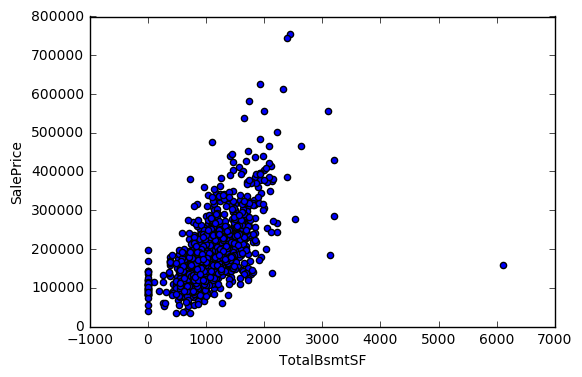

In [65]:
#地下室面积平方英尺
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

离散型变量，我们用boxplot来表示

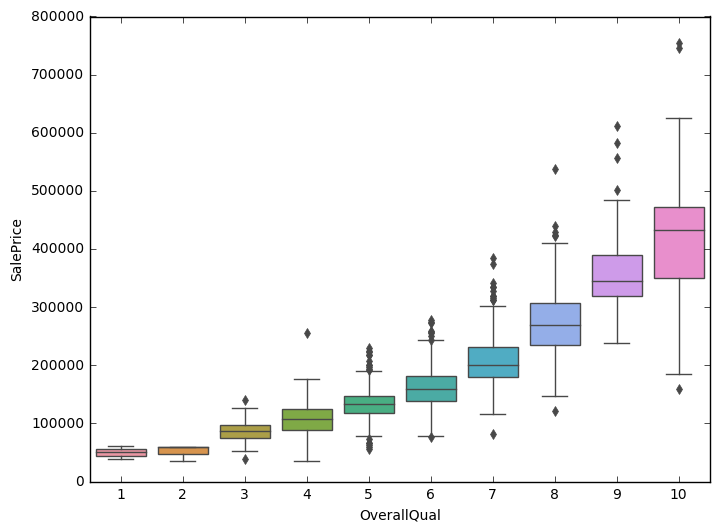

In [66]:
#整体材料和饰面质量
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

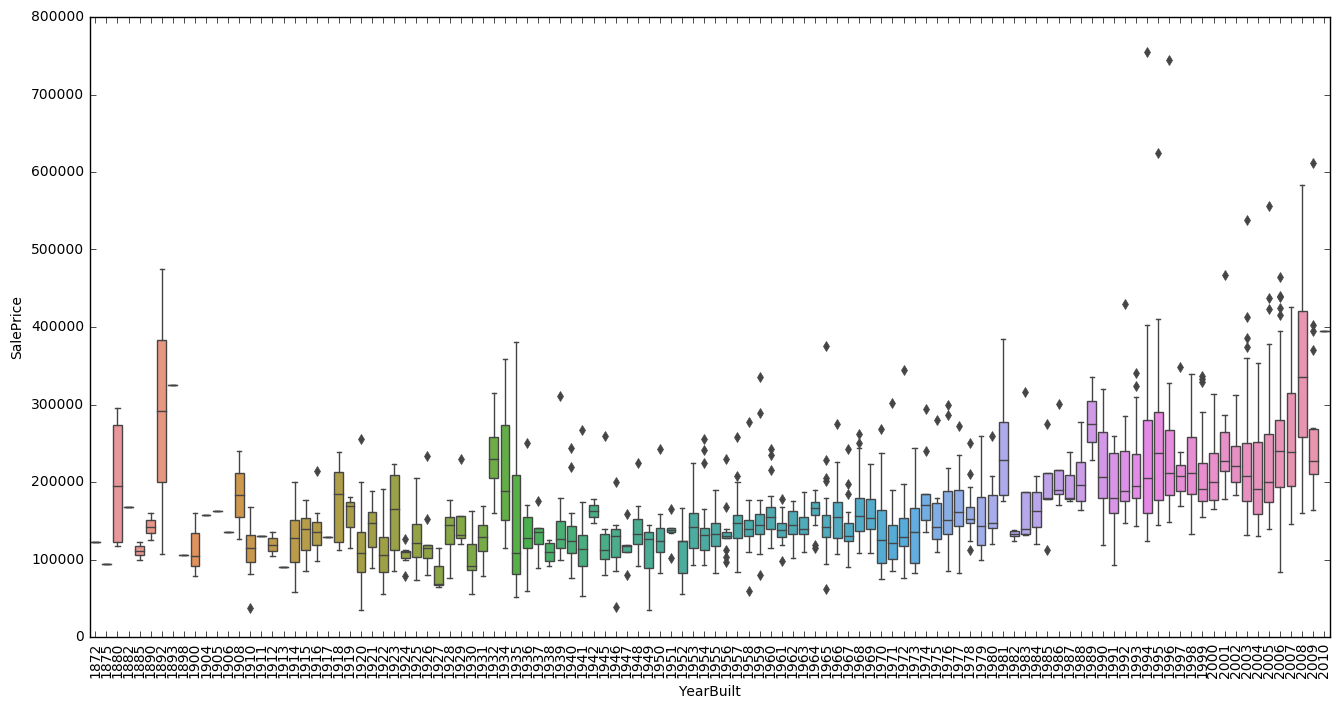

In [67]:
#原施工日期
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

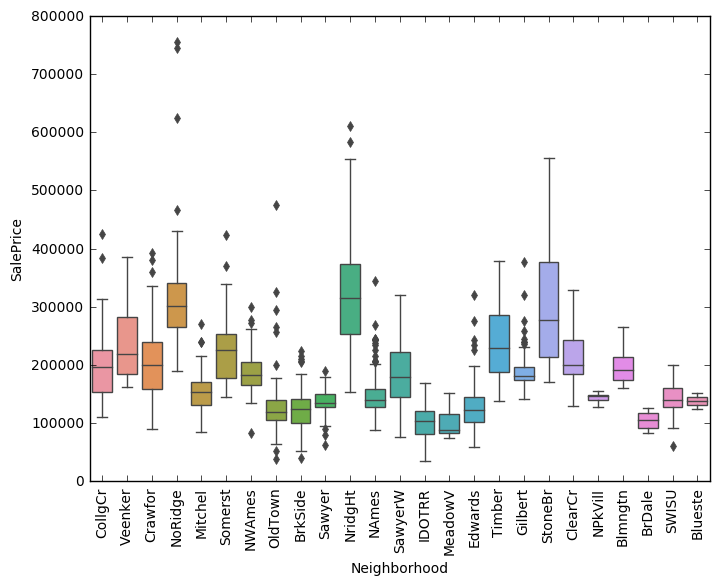

In [68]:
var = 'Neighborhood'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
#fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

来看看特征之间的相关性吧，看看哪些和价格最相关

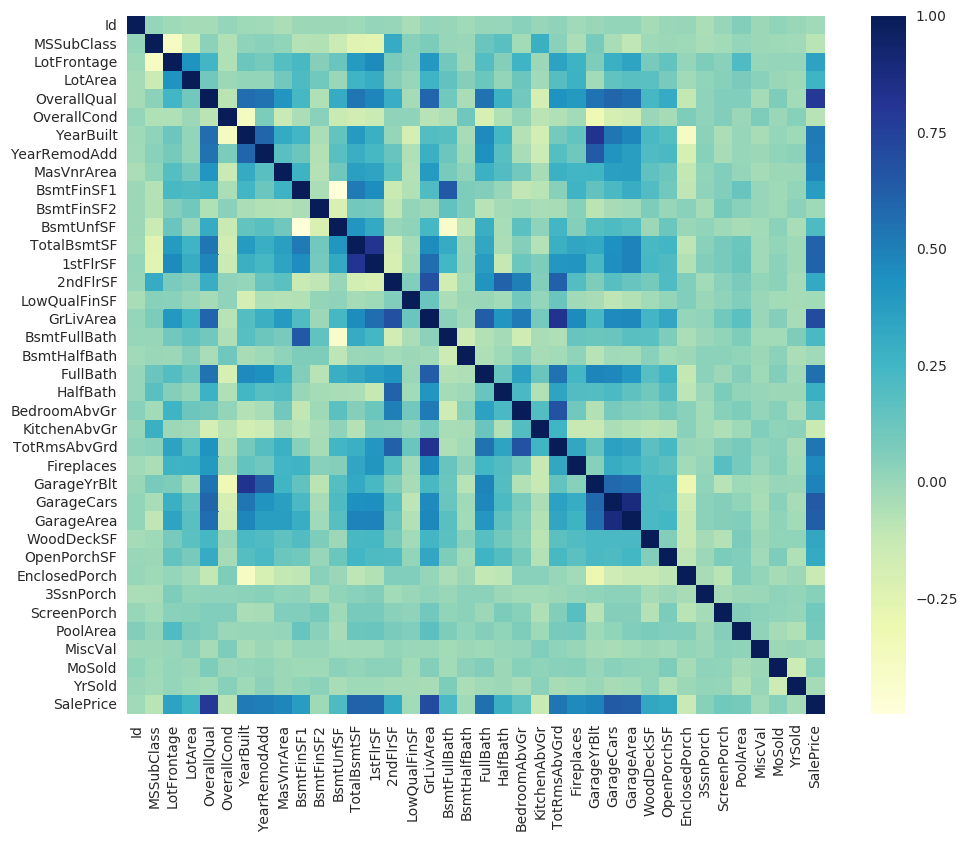

In [51]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True,cmap='YlGnBu');

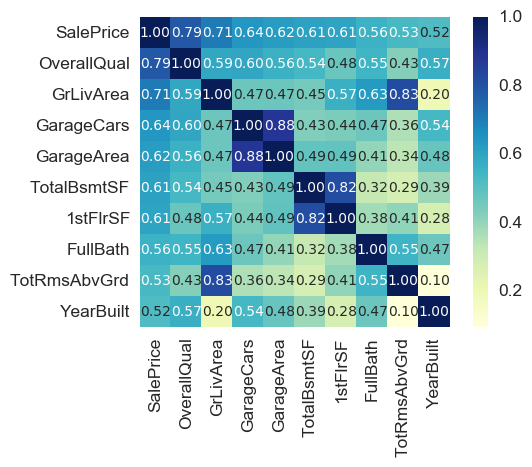

In [52]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap='YlGnBu')
plt.show()


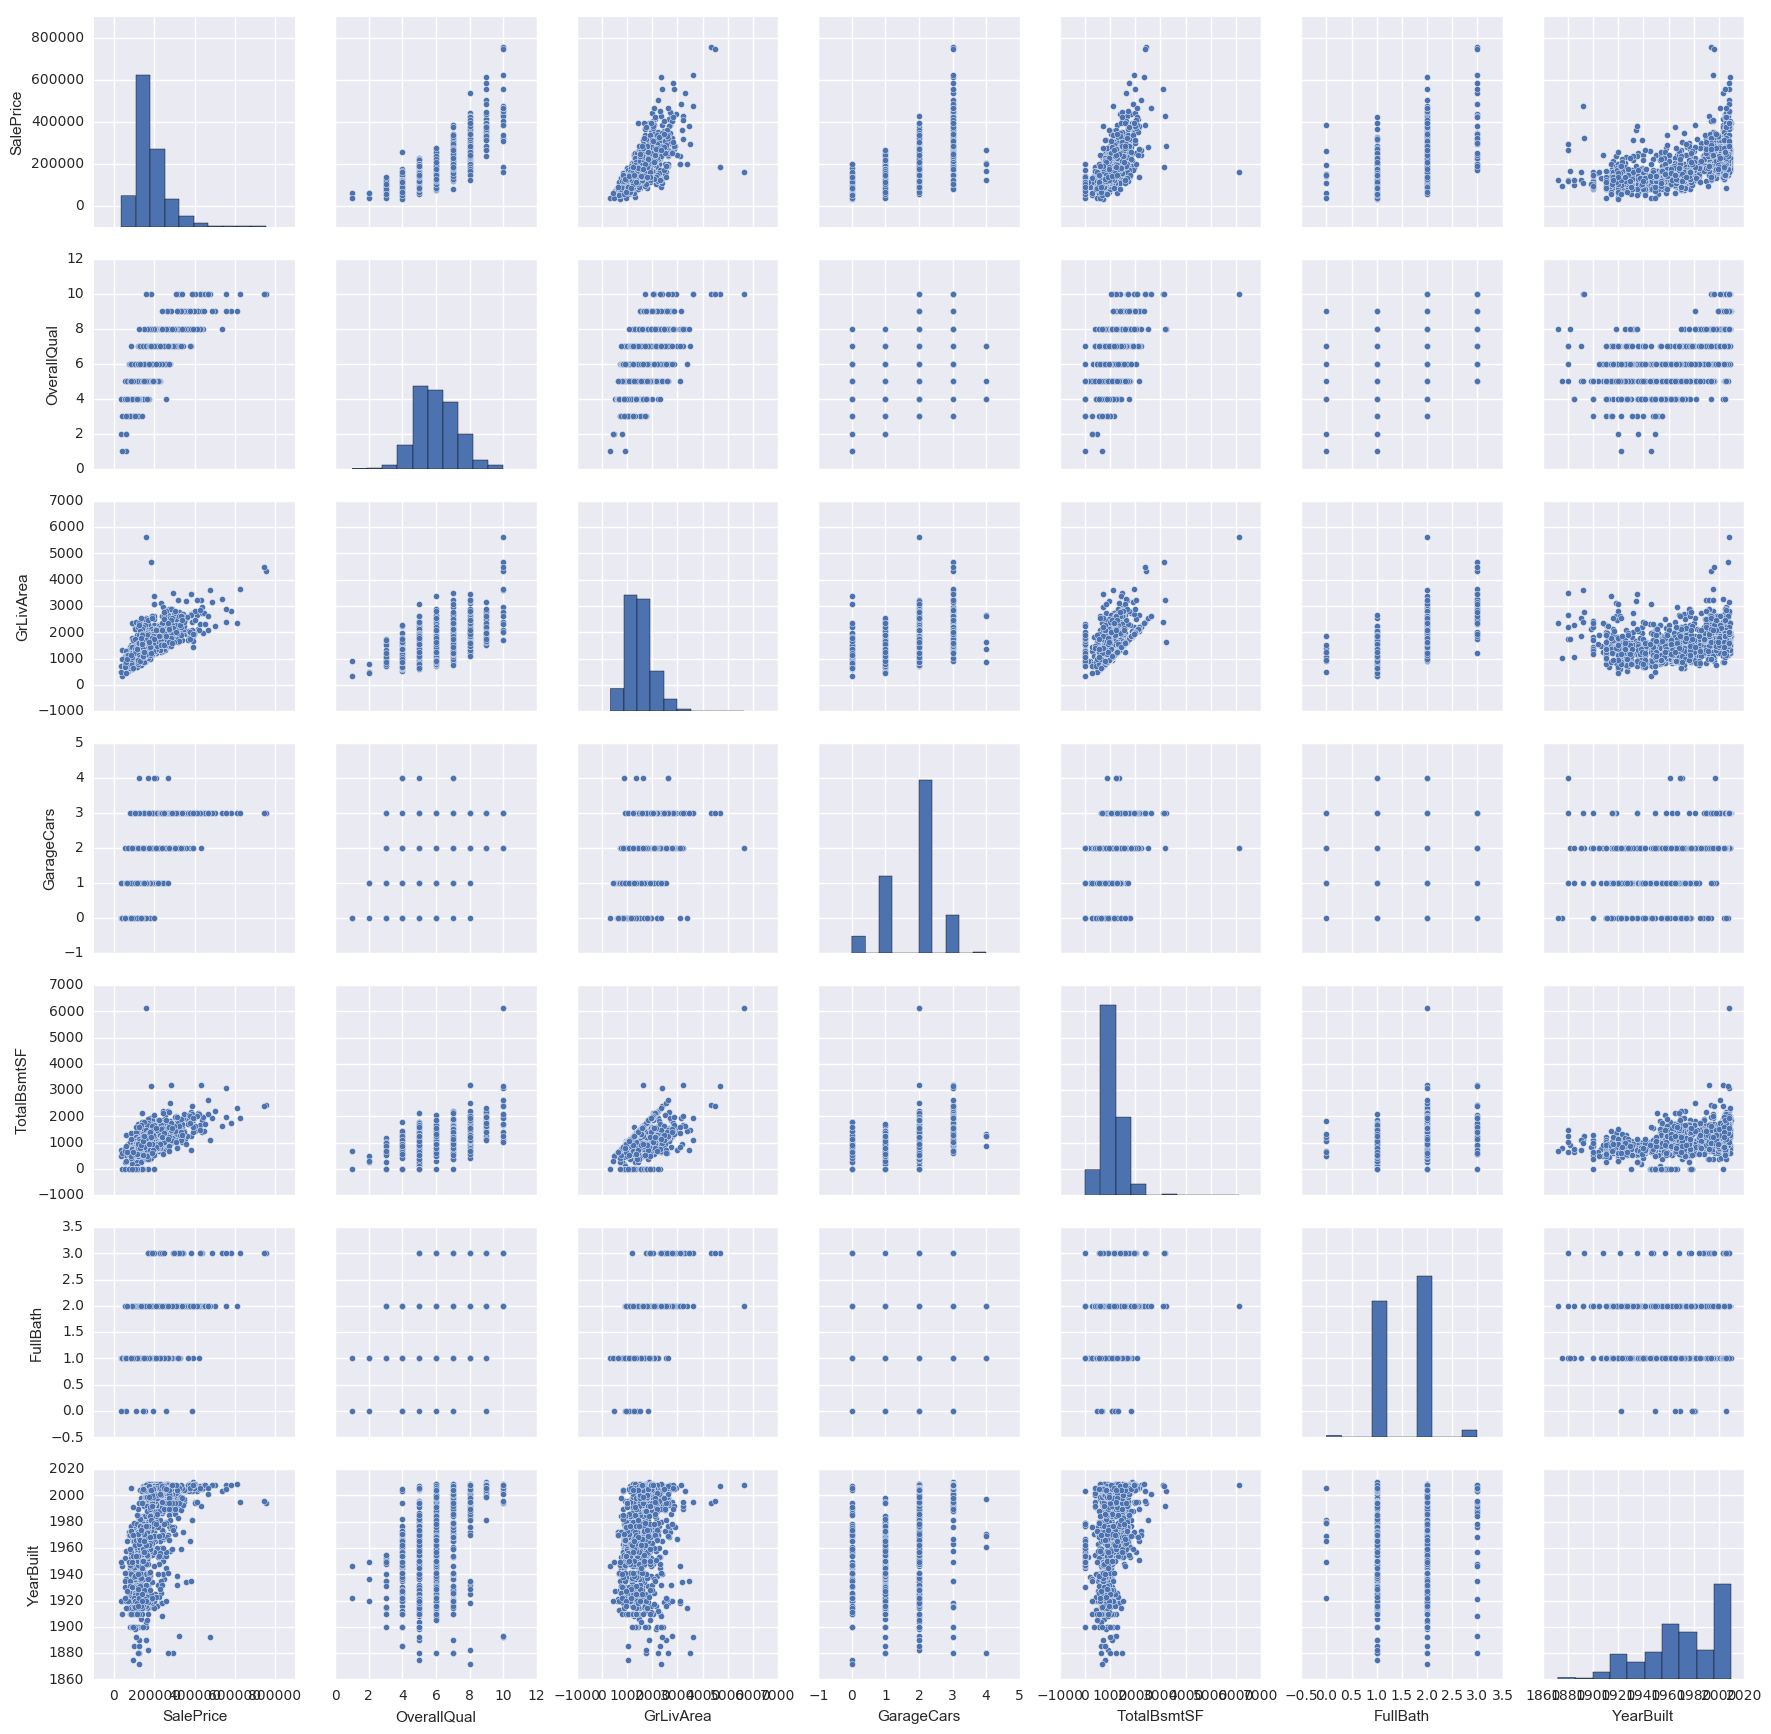

In [20]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

最后再来看一下 缺失值的情况，看起来还蛮多的。。。头疼。。。

In [21]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [116]:
import pandas as pd

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

#看看数据多大的
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#ID先留着，暂时不用
train_ID = train['Id']
test_ID = test['Id']

#去掉ID
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#看一下现在的数据的shape
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


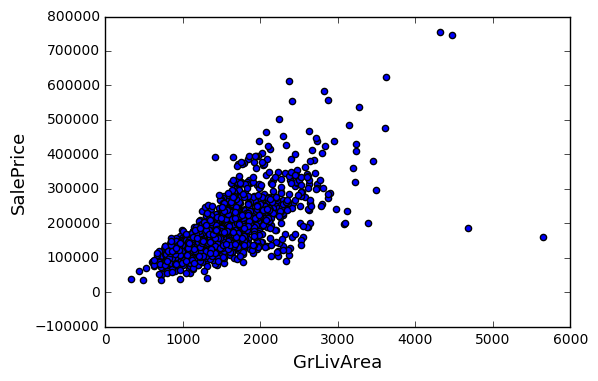

In [117]:
#发现离群点
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

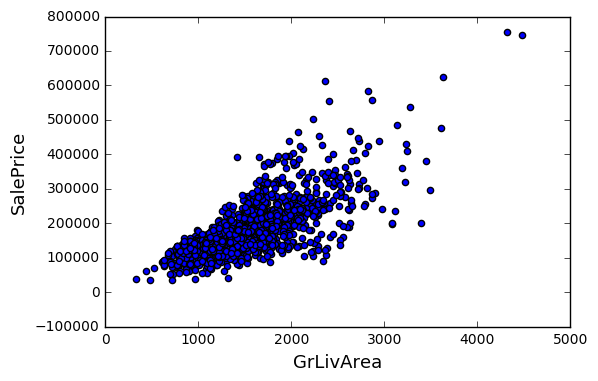

In [118]:
#干掉离群点
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## 样本正太分布变换

注：选自张之昊博文
<img src="./img/3.png" alt="FAO" width="590" >
<img src="./img/4.png" alt="FAO" width="590" >
<img src="./img/5.png" alt="FAO" width="590" >


 mu = 180932.92 and sigma = 79467.79



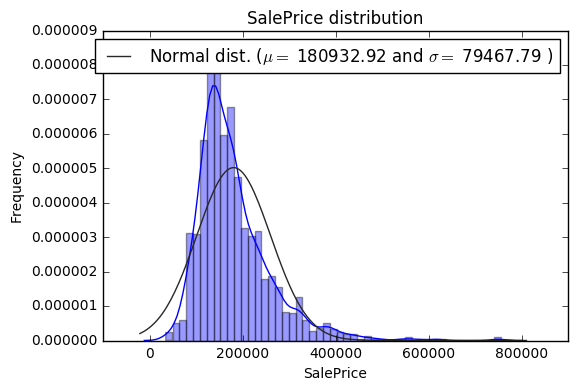

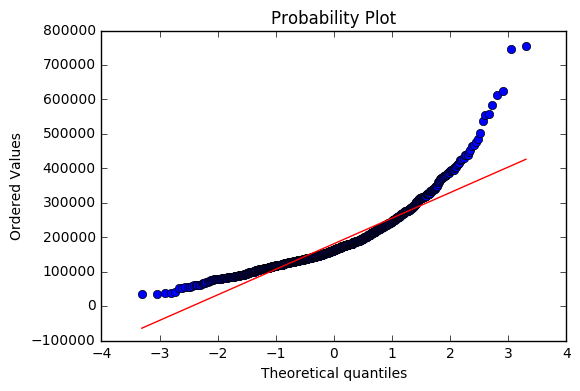

In [119]:
sns.distplot(train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#分布图
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#QQ图
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



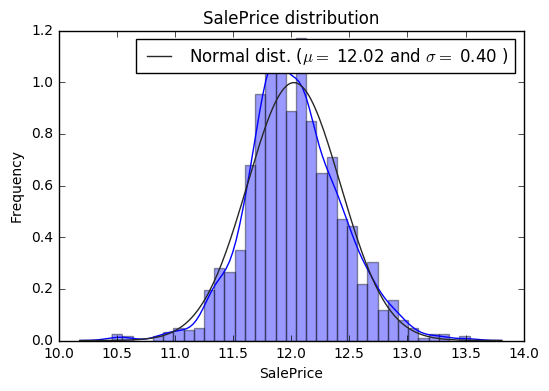

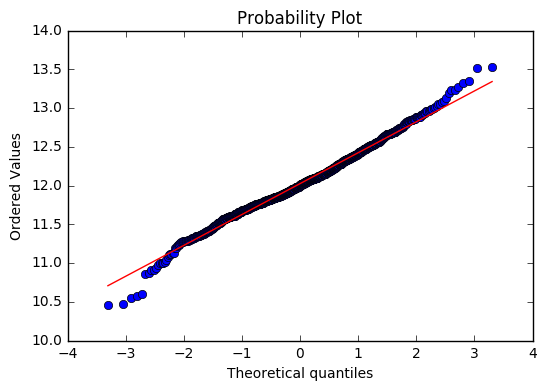

In [120]:
#对数变换log(1+x)
train["SalePrice"] = np.log1p(train["SalePrice"])

#看看新的分布
sns.distplot(train['SalePrice'] , fit=norm);

# 参数
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#画图
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#QQ图
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

大吉大利，今晚吃鸡

In [121]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


缺失值得来处理了

In [122]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


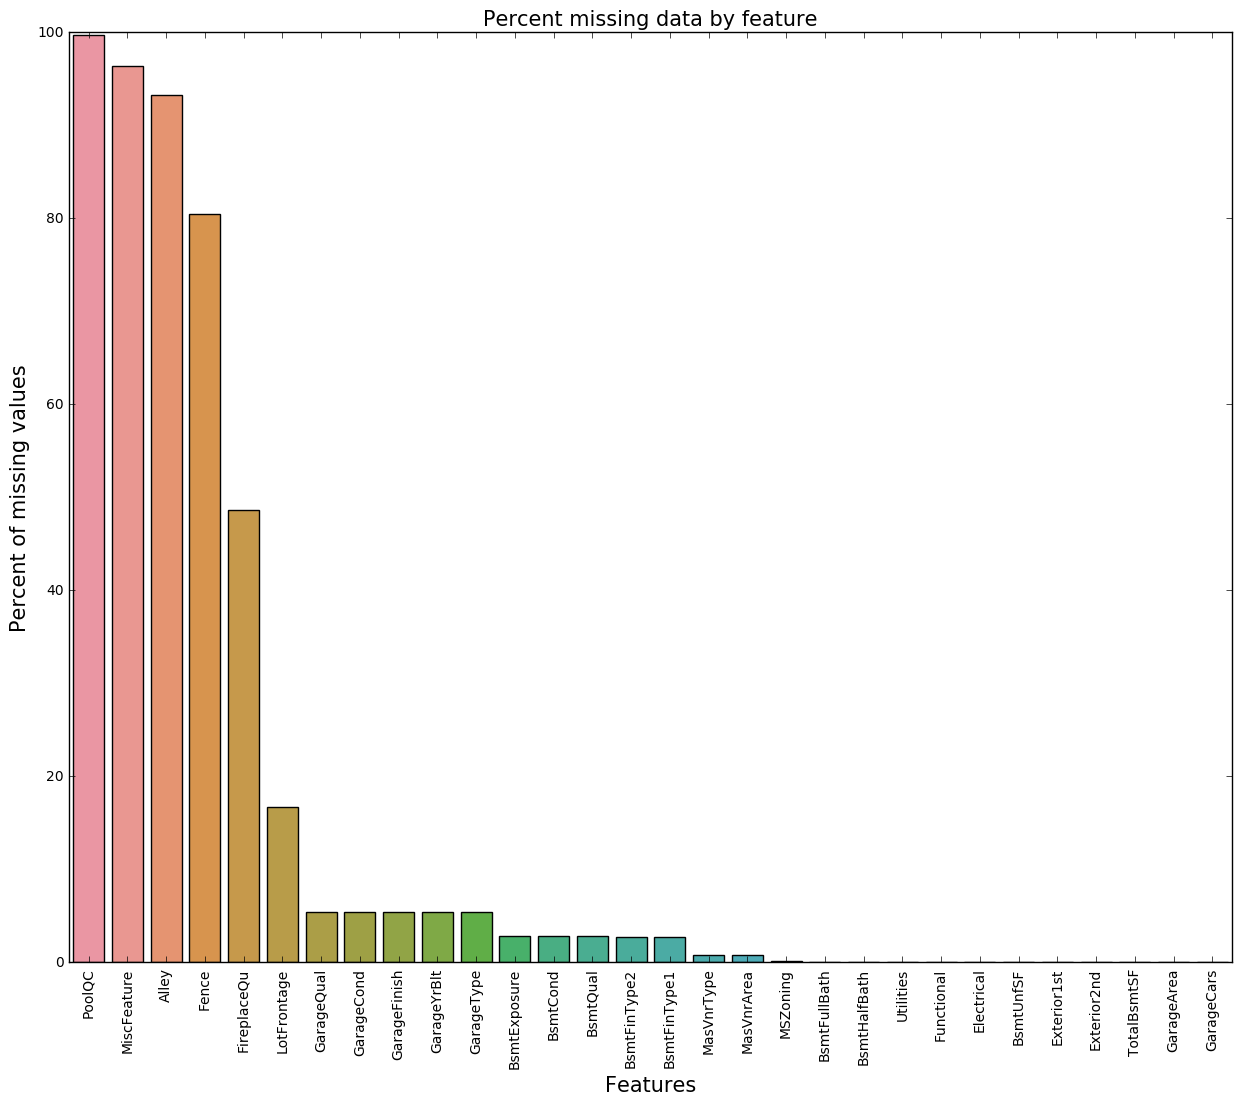

In [123]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [124]:
all_data["PoolQC"][:5]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: PoolQC, dtype: object

In [125]:
#游泳池？上流社会？
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [126]:
all_data["PoolQC"][:5]

0    None
1    None
2    None
3    None
4    None
Name: PoolQC, dtype: object

In [127]:
#没有特征。。。
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [128]:
#通道的入口
all_data["Alley"] = all_data["Alley"].fillna("None")

In [129]:
#栅栏
all_data["Fence"] = all_data["Fence"].fillna("None")

In [130]:
#壁炉
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [131]:
#到街道的距离
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [132]:
#车库的事
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [133]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [134]:
#地下室的事
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [135]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [136]:
#砌体
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [137]:
all_data['MSZoning'].mode()

0    RL
dtype: object

In [138]:
#一般分区分类，用众数来吧
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [139]:
#Functional家庭功能评定
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [140]:
#电力系统
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [141]:
#厨房的品质
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [142]:
#外部
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [143]:
#销售类型
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [144]:
#建筑类型
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [145]:
all_data = all_data.drop(['Utilities'], axis=1)

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [146]:
#有些并不是连续值，给他们做成类别值吧
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

all_data['OverallCond'] = all_data['OverallCond'].astype(str)

all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

使用sklearn进行标签映射

In [147]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [148]:
#增加一个新特征总面积
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

对于咱的这些特征是不是也得变换下呀

In [149]:
from scipy.stats import norm, skew

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


## Box-Cox变换

Box-Cox 变换在上世纪六十年代由两位英国统计学家 George E.P. Box 和 David Cox 提出

假设样本里一共有 n 个数据点，分别是y1 y2...yn,找到一个合适的函数使得数据点经过变换之后能整体的正太型能够最好


<img src="./img/1.png" alt="FAO" width="290" >
<img src="./img/2.png" alt="FAO" width="190" >

关键点在于如何找到一个合适的参数，一般情况下0.15为经验值

In [150]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
    

There are 59 skewed numerical features to Box Cox transform


In [151]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [152]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [153]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [154]:
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

make_pipeline：级联起来去做事
RobustScaler：更适合处理离群点

In [155]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

ElasticNet同时使用l1和l2

In [156]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

KernelRidge带有核函数的岭回归

In [178]:
#KRR = KernelRidge(alpha=0.6, kernel='rbf')
#http://blog.csdn.net/wsj998689aa/article/details/47027365   核函数介绍
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [179]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [180]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             nthread = -1)


In [181]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0074)



In [182]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1116 (0.0074)



In [183]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1153 (0.0075)



In [184]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1177 (0.0080)



In [185]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1151 (0.0060)



In [186]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [187]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1091 (0.0075)



In [188]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [189]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1085 (0.0074)
